In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
sklearn.set_config(transform_output='pandas')

## PCA - метод главных компонент

### Сгенерируем нормально распределенную величину Х1 и линейно зависимую от нее величину Х2

In [2]:
n = 100
x1 = np.random.normal(0, 1, size=n)
x2 = 2 * x1 + np.random.normal(0, 0.5, size=n)
x3 = 1.5 * x1 + np.random.normal(0, 0.7, size=n)
x4 = np.random.normal(0, 1, size=n)
df = pd.DataFrame({'x1': x1, 'x2': x2})  #  'x3': x3, 'x4': x4

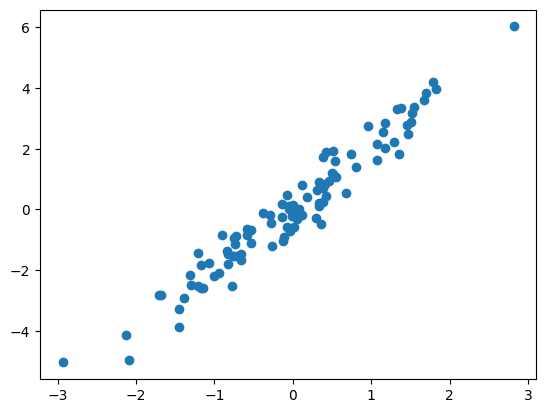

In [3]:
plt.scatter(df['x1'], df['x2'])

In [4]:
df.head(5)

,x1,x2
0,-0.740127,-1.127928
1,0.327195,0.888190
2,0.295581,-0.288449
3,0.418472,1.894862
4,-0.073350,-0.588773


<Axes: >

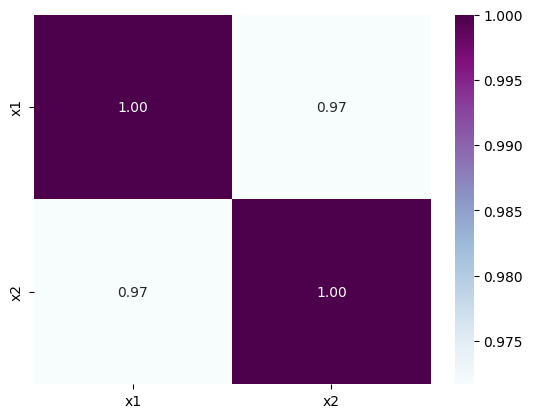

In [5]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='BuPu')

In [6]:
pca = PCA(n_components=1)

In [7]:
pca.fit(df)

PCA(n_components=1)

In [8]:
pca_df = pca.transform(df)
pca_df.head()

,pca0
0,-1.343765
1,0.935518
2,-0.139752
3,1.883160
4,-0.569801


In [9]:
df.head(5)

,x1,x2
0,-0.740127,-1.127928
1,0.327195,0.888190
2,0.295581,-0.288449
3,0.418472,1.894862
4,-0.073350,-0.588773


In [10]:
pca.explained_variance_ratio_

array([0.9912795])

In [11]:
pca.components_

array([[0.43118426, 0.90226389]])

### Сгенерируем независимые величины: зарплата и возраст

In [12]:
n = 100
salary = np.random.normal(50000, 10000, size=n)
age = np.random.randint(20, 100, size=n)

df = pd.DataFrame({'age': age, 'salary': salary})

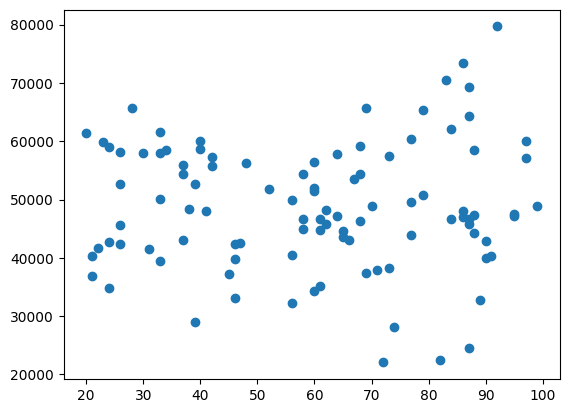

In [13]:
plt.scatter(df['age'], df['salary'])

In [14]:
pca.fit(df)

PCA(n_components=1)

In [15]:
pca_df = pca.transform(df)

In [16]:
pca_df.head(5)

,pca0
0,-26752.246429
1,9188.597607
2,146.458974
3,-2976.869877
4,3094.445566


In [17]:
pca.explained_variance_ratio_

array([0.99999553])

### Применим масштабирование признаков для приведения их к безразмерным величинам

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
std = StandardScaler()

In [20]:
norm_df = std.fit_transform(df)

In [21]:
norm_df.describe()

,age,salary
count,1.000000e+02,1.000000e+02
mean,1.054712e-16,-2.187139e-16
std,1.005038e+00,1.005038e+00
min,-1.726119e+00,-2.459995e+00
25%,-8.998086e-01,-5.932000e-01
50%,5.697193e-02,-9.561178e-02
75%,8.724099e-01,7.835150e-01
max,1.709593e+00,2.839795e+00


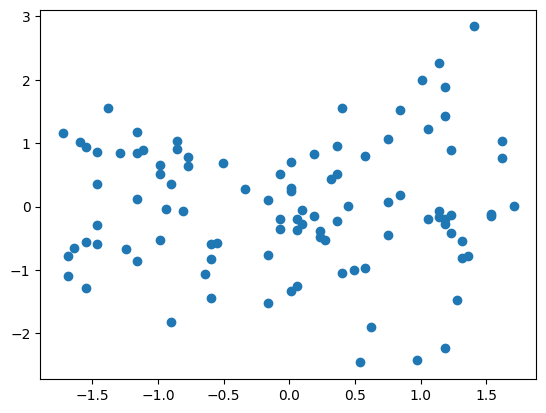

In [22]:
plt.scatter(norm_df['age'], norm_df['salary'])

In [23]:
pca_df = pca.fit_transform(norm_df)

In [24]:
pca_df.head(5)

,pca0
0,-1.360921
1,-0.315570
2,1.218388
3,-0.122524
4,0.210740


In [25]:
pca.explained_variance_ratio_

array([0.51297399])

## SVD

In [26]:
import skimage

можете закинуть путь к локальному файлу или укзаать url-ссылку на картинку

In [27]:
image = skimage.io.imread('https://i.pinimg.com/736x/af/56/35/af5635fb5064debed7ea592d821d6842.jpg')

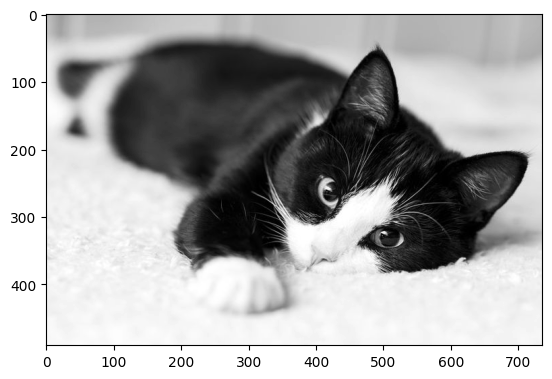

In [28]:
plt.imshow(image, cmap='gray')

In [29]:
image.shape # отсутствие третьего значения - один канал, 3 - три канала (491, 736, 3) - цветное

(491, 736)

In [30]:
# image = skimage.color.rgb2gray(image) - только в случае цветного (трехканального) изображения

In [31]:
U, sing_values, V = np.linalg.svd(image)

In [32]:
U.shape, V.shape, sing_values.shape

((491, 491), (736, 736), (491,))

In [33]:
S = np.zeros(shape=image.shape)

In [34]:
np.fill_diagonal(S, sing_values)

In [35]:
M = U@S@V

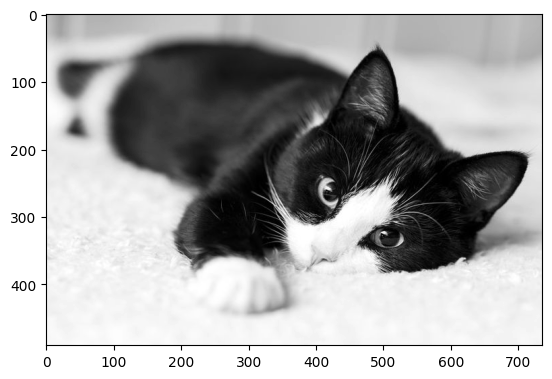

In [36]:
plt.imshow(M, cmap='grey')

In [37]:
top_k = 400
trunc_U = U[:, :top_k]
trunc_S = S[:top_k, :top_k]
trunc_V = V[:top_k, :]
trunc_M = trunc_U@trunc_S@trunc_V

Text(0.5, 1.0, 'SVD top 400')

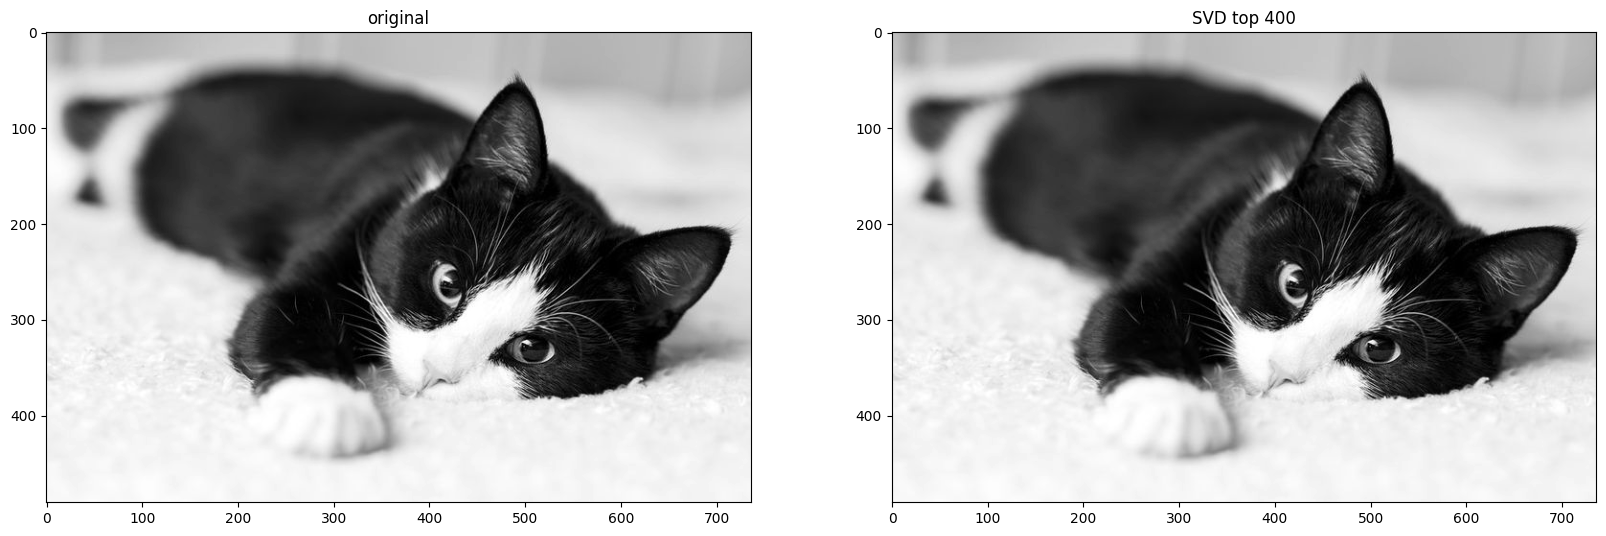

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(U@S@V, cmap='gray')
ax[0].set_title('original')
ax[1].imshow(trunc_M, cmap='gray')
ax[1].set_title(f"SVD top {top_k}")